In [1]:
# make sure matplotlib shows images inline
%matplotlib inline

In [2]:
# check which modules are installed
#help("modules")

In [2]:
# load packages
import os
import cv2
from keras.models import model_from_json
from PIL import Image
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# set directory
os.chdir("D:/Documents/GitHub/HandSign_Recognition")

In [4]:
# load json and create model
json_file = open('my_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("my_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [5]:
# numpy Reshape only changes the shape of the data, but not the total size, 
# so you can for example reshape an array of shape 1x9 into one which is 3x3, but not into 2x4.
# numpy Resize does similar things, but lets you increase the size, 
# in which case it will fill new space with elements of array which is being resized.

def predict(model, img, target_size, top_n = 3):
    """Run model prediction on image
        model: keras model
        img: PIL format image
        target_size: (width, height) tuple
        top_n: # of top predictions to return
    """
    if img.size != target_size:
        print("the original size of the image is: " + str(img.size))
        img = img.resize(target_size)
        print("the new size of the image is: " + str(img.size))
    
    # convert to numpy array and preprocess
    x = np.array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x.astype(float))
    
    # make a prediction
    pred = model.predict(x)
    print(pred)
    
    # label the prediction
    pred_label = np.argmax(pred, axis = 1)
    
    # return the label of the prediction
    return pred_label
    
    #preds = model.predict(x)
    #return decode_predictions(preds, top = top_n)[0]

In [7]:
# read an image from file into a numpy array
img = cv2.cvtColor(cv2.imread('D:/Documents/GitHub/HandSign_Recognition/00 Data/img/7.jpg'), cv2.COLOR_BGR2RGB)
print(type(img))
# convert a numpy array to a PIL image format
img = Image.fromarray(img)
print(type(img))

<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>


In [ ]:
# turn on the camera
camera = cv2.VideoCapture(0)

# check if the camera is on
print("camera on: " + str(camera.isOpened()))

In [54]:
# as long as the camera is on, read the images
while True:
    return_value,image = camera.read()
    # check if the camera gives an image
    if return_value:
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        cv2.imshow('image',image)
    if cv2.waitKey(1)& 0xFF == ord('s'):
        print ('stop!')
        break

# turn off the camera
camera.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


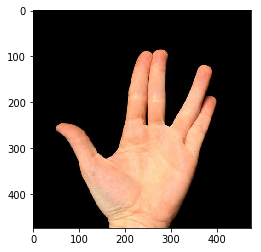

In [50]:
# read all images from file into an array
# cv2 assumes colors are BGR, so we also convert this to RGB
data = np.array([cv2.cvtColor(cv2.imread('D:/Documents/GitHub/HandSign_Recognition/00 Data/img/' + name), cv2.COLOR_BGR2RGB) for name in os.listdir('D:/Documents/GitHub/HandSign_Recognition/00 Data/img/')], dtype = np.object)

[print(type(x)) for x in data]

plt.imshow(data[6])